In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def calculate_step(n, cache = {}, peak_cache = {}):
    assert n >= 1, "n must be >= 1"
    count = 0
    original = n
    peak = n
    while n != 1:
        if n in cache: # Hit cache
            cache[original] = count + cache[n]
            peak_cache[original] = peak_cache[n] if peak_cache[n] > peak else peak
            return cache[original], peak_cache[original]
        if n % 2 == 0:
            n = n // 2
            count += 1
        else:
            tmp = (3 * n + 1)
            if tmp > peak:
                peak = tmp
            n = tmp // 2
            count += 2
    peak_cache[original] = peak
    cache[original] = count
    return count, peak

In [3]:
N = 10000
cache = {} # memorization FTW
peak_cache = {}

In [4]:
numbers = np.array([i for i in range(1, N)])
steps = np.array([calculate_step(n, cache, peak_cache)[0] for n in numbers])
peaks = np.array([calculate_step(n, cache, peak_cache)[1] for n in numbers])

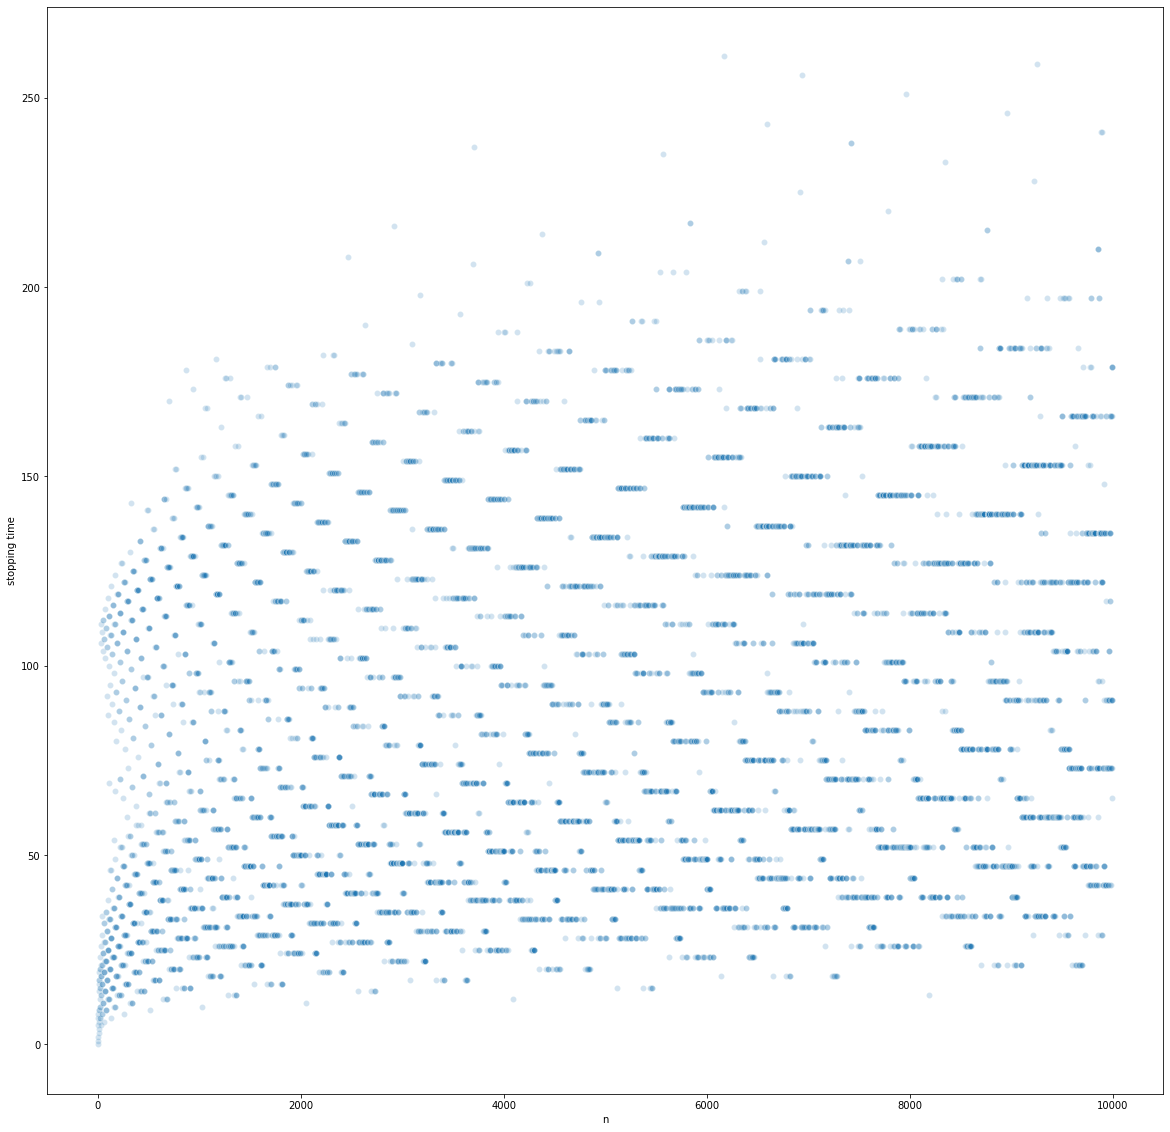

In [5]:
f, ax = plt.subplots(figsize=(20, 20))
ax.set(xlabel="n", ylabel="stopping time")
sns.scatterplot(x=numbers, y=steps, ax=ax, marker='o', alpha=0.2)

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
ax.set(xlabel="n", ylabel="highest number")
plt.ylim(0, N * 0,1)
sns.scatterplot(x=numbers, y=peaks, ax=ax)

/Users/khoi/Documents/Workspace/Repositories/khoi/collatz-conjecture/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  This is separate from the ipykernel package so we can avoid doing imports until


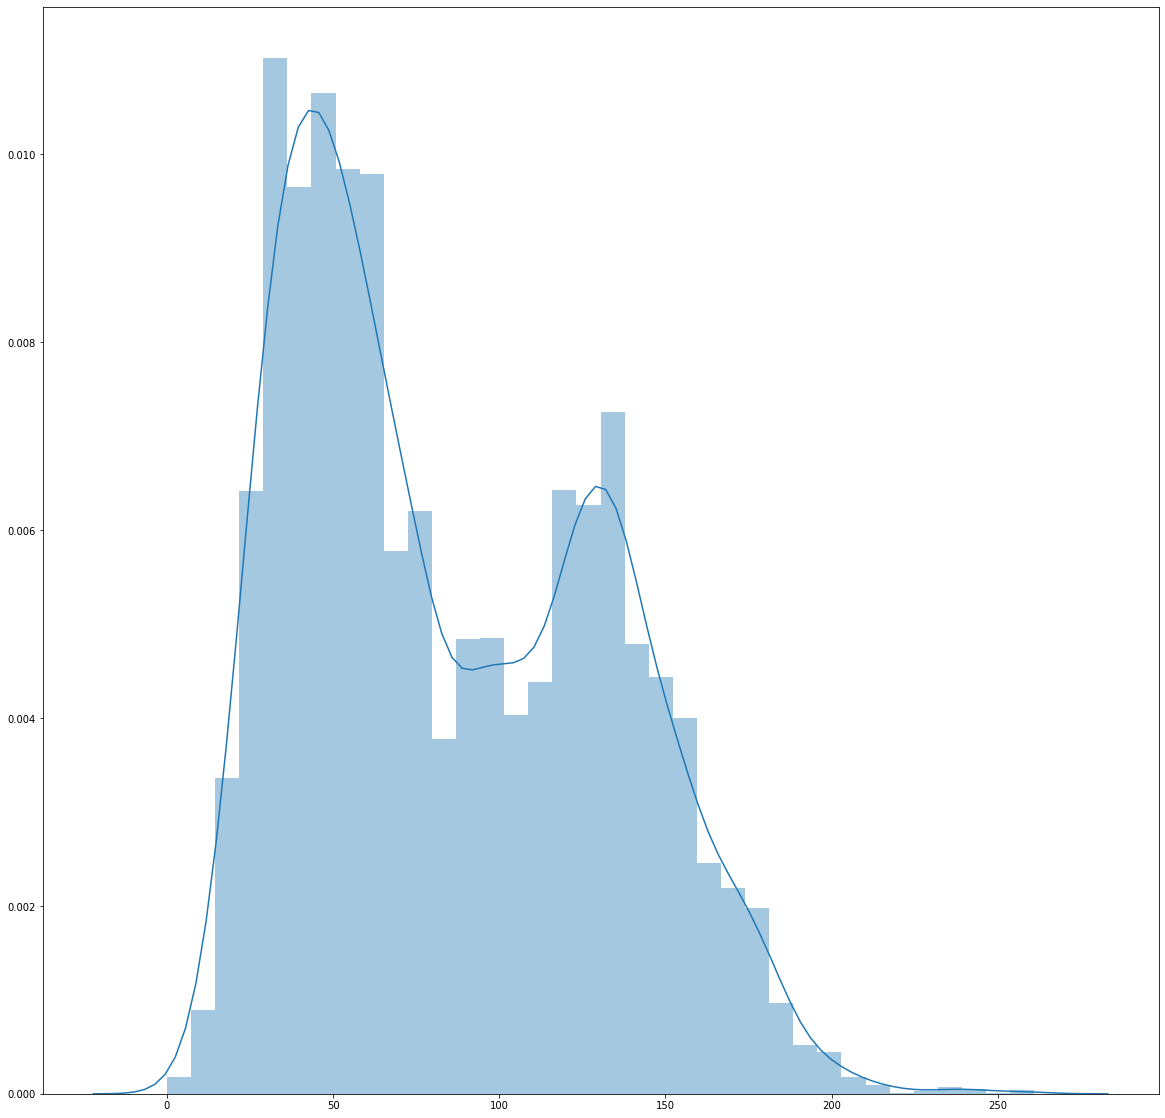

In [7]:
f, ax = plt.subplots(figsize=(20, 20))
sns.distplot(steps, ax=ax)